## Feature Engineering and Visualisation on Delhi Climate Dataset from Kaggle

Dataset: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

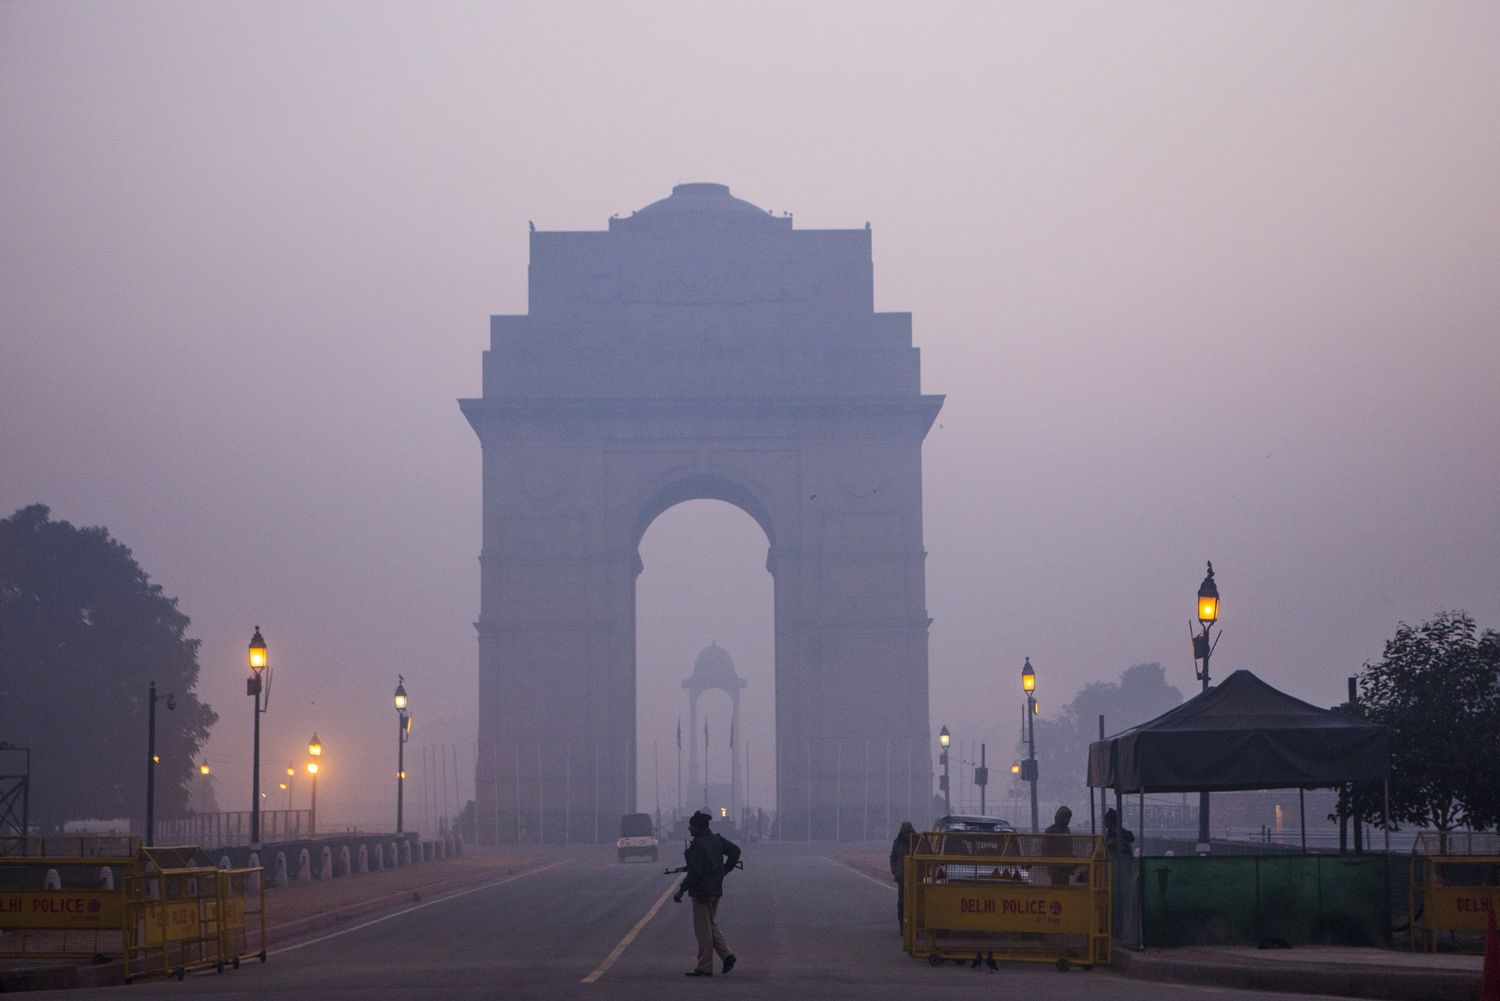

Before jumping into the proccess I would like to tell you about the changes I made in the dataset



1.   The Original Data set contained 4 columns along with date namely: meantemp, humidity, wind_speed and mean_pressure
2.   For the purpose of this assignment, I converted this dataset into univariate hence kept meantemp and removed other columns
3.  Peformed those changes in Excel



In [ ]:
# importting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
# reading the data into pandas dataframe
delhi = pd.read_csv("/content/DelhiClimateMeanTemp.csv"
                    ,header = 0, index_col = 0,
                    parse_dates = True,
                    squeeze = True)

<ipython-input-67-9ad92a48d198>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  delhi = pd.read_csv("/content/DelhiClimateMeanTemp.csv"
<ipython-input-67-9ad92a48d198>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  delhi = pd.read_csv("/content/DelhiClimateMeanTemp.csv"


# Exploring the dataset

In [ ]:
delhi.head()

date
2013-01-01    10.000000
2013-02-01     7.400000
2013-03-01     7.166667
2013-04-01     8.666667
2013-05-01     6.000000
Name: meantemp, dtype: float64

In [ ]:
delhi.tail()

date
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, dtype: float64

In [ ]:
delhi.describe()

count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64

## Visualizing the data

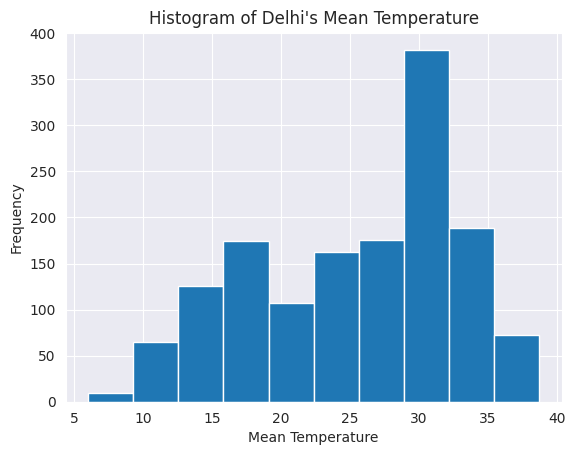

In [ ]:
# creating a histogram
delhi.hist()
plt.title("Histogram of Delhi's Mean Temperature")
plt.xlabel("Mean Temperature")
plt.ylabel("Frequency")
plt.show()

**Inference:** We can see the distribution of datapoint and we can infer that the data is `left skewed` and it isn't normally distributed

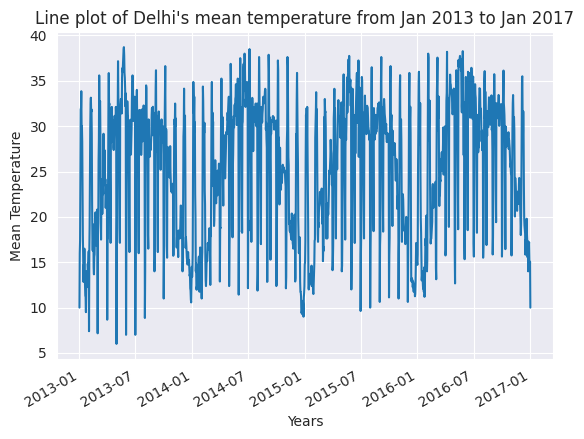

In [ ]:
# creating line plot
delhi.plot();
plt.xlabel("Years")
plt.ylabel("Mean Temperature")
plt.title("Line plot of Delhi's mean temperature from Jan 2013 to Jan 2017");
plt.show()

**Inference:** By just looking at this visual


*   we cannot see a clear trend as the data it is oscillating around the level
*   we can see seasonality from in yearly intervals eg: from `01-2013` to `01-2014`



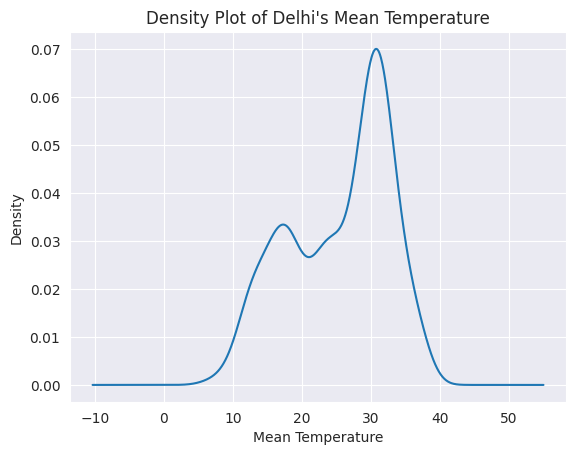

In [ ]:
# creating kernal density plot
delhi.plot(kind = 'kde');
plt.xlabel("Mean Temperature")
plt.ylabel("Density")
plt.title("Density Plot of Delhi's Mean Temperature")
plt.show()

**Inference:** In this visual, you can once again see the distribution of the data points but in a much smoother form

- After looking at the data distribution, we know that the data is left skewed
- Data has it's peak around roughly `30-35`

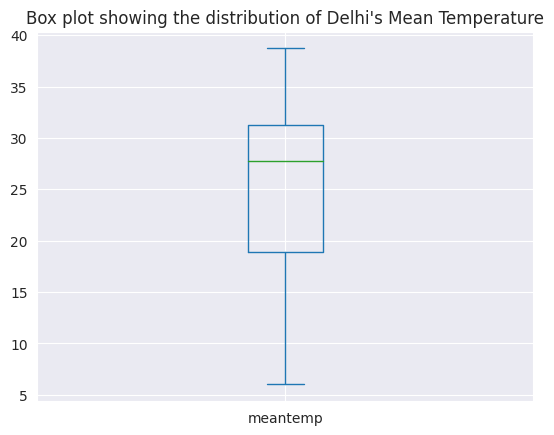

In [ ]:
# creating box plot
delhi.plot(kind = 'box');
plt.title("Box plot showing the distribution of Delhi's Mean Temperature")
plt.show()

**Inference:**
- We can see that the median is towards the 3st Quartile that means the there are more data between the 1rd Quartile and the median
- We do not have any outliers in the dataset

# Feature Engineering

## DateTime Features

In [ ]:
# Creating duplicate dataframe for feature engineering
dummy_df = pd.DataFrame(delhi)
display(dummy_df.shape)

(1462, 1)

In [ ]:
# creating day related datetime features
dummy_df["DayOfMonth"] = dummy_df.index.day
dummy_df["DayOfWeek"] = dummy_df.index.day_of_week
dummy_df["DayOfYear"] = dummy_df.index.day_of_year
display(dummy_df.shape)

(1462, 4)

In [ ]:
# checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear
date,,,,
2013-01-01,10.000000,1,1,1
2013-02-01,7.400000,1,4,32
2013-03-01,7.166667,1,4,60
2013-04-01,8.666667,1,0,91
2013-05-01,6.000000,1,2,121


In [ ]:
# creating month related datetime feature
dummy_df["Month"] = dummy_df.index.month
dummy_df["IsMonthStart"] = dummy_df.index.is_month_start
dummy_df["IsMonthEnd"] = dummy_df.index.is_month_end
dummy_df["DaysInMonth"] = dummy_df.index.days_in_month
display(dummy_df.shape)

(1462, 8)

In [ ]:
# checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear,Month,IsMonthStart,IsMonthEnd,DaysInMonth
date,,,,,,,,
2013-01-01,10.000000,1,1,1,1,True,False,31
2013-02-01,7.400000,1,4,32,2,True,False,28
2013-03-01,7.166667,1,4,60,3,True,False,31
2013-04-01,8.666667,1,0,91,4,True,False,30
2013-05-01,6.000000,1,2,121,5,True,False,31


In [ ]:
# creating week related datetime features
dummy_df["Week"] = dummy_df.index.week
dummy_df["Weekday"] = dummy_df.index.weekday
#dummy_df["WeekOfYear"] = dummy_df.index.weekofyear [is it the same as week]
display(dummy_df.shape)

<ipython-input-80-2b3cae568f78>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dummy_df["Week"] = dummy_df.index.week


(1462, 10)

In [ ]:
# checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear,Month,IsMonthStart,IsMonthEnd,DaysInMonth,Week,Weekday
date,,,,,,,,,,
2013-01-01,10.000000,1,1,1,1,True,False,31,1,1
2013-02-01,7.400000,1,4,32,2,True,False,28,5,4
2013-03-01,7.166667,1,4,60,3,True,False,31,9,4
2013-04-01,8.666667,1,0,91,4,True,False,30,14,0
2013-05-01,6.000000,1,2,121,5,True,False,31,18,2


## Lagged Features

In [ ]:
# creating 3 lagged features
dummy_df["Lag1"] = dummy_df["meantemp"].shift(1)
dummy_df["Lag2"] = dummy_df["meantemp"].shift(2)
dummy_df["Lag3"] = dummy_df["meantemp"].shift(3)
display(dummy_df.shape)

(1462, 13)

In [ ]:
#checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear,Month,IsMonthStart,IsMonthEnd,DaysInMonth,Week,Weekday,Lag1,Lag2,Lag3
date,,,,,,,,,,,,,
2013-01-01,10.000000,1,1,1,1,True,False,31,1,1,NaN,NaN,NaN
2013-02-01,7.400000,1,4,32,2,True,False,28,5,4,10.000000,NaN,NaN
2013-03-01,7.166667,1,4,60,3,True,False,31,9,4,7.400000,10.000000,NaN
2013-04-01,8.666667,1,0,91,4,True,False,30,14,0,7.166667,7.400000,10.0
2013-05-01,6.000000,1,2,121,5,True,False,31,18,2,8.666667,7.166667,7.4


## Window Features

In [ ]:
# rolling mean
dummy_df["MA_5"] = dummy_df["meantemp"].rolling(5).mean()
dummy_df["MA_10"] = dummy_df["meantemp"].rolling(10).mean()
dummy_df["MA_15"] = dummy_df["meantemp"].rolling(15).mean()

# expanding mean
dummy_df["ExpandingMean"] = dummy_df["meantemp"].expanding().mean()
dummy_df.shape

(1462, 17)

In [ ]:
# checking the dataset
dummy_df.head()

,meantemp,DayOfMonth,DayOfWeek,DayOfYear,Month,IsMonthStart,IsMonthEnd,DaysInMonth,Week,Weekday,Lag1,Lag2,Lag3,MA_5,MA_10,MA_15,ExpandingMean
date,,,,,,,,,,,,,,,,,
2013-01-01,10.000000,1,1,1,1,True,False,31,1,1,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
2013-02-01,7.400000,1,4,32,2,True,False,28,5,4,10.000000,NaN,NaN,NaN,NaN,NaN,8.700000
2013-03-01,7.166667,1,4,60,3,True,False,31,9,4,7.400000,10.000000,NaN,NaN,NaN,NaN,8.188889
2013-04-01,8.666667,1,0,91,4,True,False,30,14,0,7.166667,7.400000,10.0,NaN,NaN,NaN,8.308333
2013-05-01,6.000000,1,2,121,5,True,False,31,18,2,8.666667,7.166667,7.4,7.846667,NaN,NaN,7.846667
